In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the modules
sys.path.insert(1, "/home/nexus-admin/NEXUS_RF/BackendTools")
import ResonanceFitter as fitres

datapath = "/data/Misc"
file_spc = "20230327_181800_BroadSpectrumTrans.csv"
file_Alr = "20230327_183100_AlRes.csv"

line_atten_dB = 56.5

In [2]:
data_spc = pd.read_csv(os.path.join(datapath,file_spc),header=2)
key_f, key_lm, key_deg = data_spc.keys()
data_spc["phi"] = data_spc[key_deg] * np.pi/180.
data_spc["mag"] = np.power(10,data_spc[key_lm]/20.)
data_spc["S21r"] = data_spc["mag"]*np.cos(data_spc["phi"])
data_spc["S21i"] = data_spc["mag"]*np.sin(data_spc["phi"])
data_spc

,! Stimulus(Hz),S21(dB),S21(°),phi,mag,S21r,S21i
0,3.900000e+09,-5.737084,128.446023,2.241806,0.516590,-0.321204,0.404590
1,3.900025e+09,-5.771580,127.699063,2.228769,0.514542,-0.314650,0.407123
2,3.900050e+09,-5.816181,127.072251,2.217829,0.511907,-0.308589,0.408438
3,3.900075e+09,-5.798275,126.567098,2.209013,0.512963,-0.305605,0.411991
4,3.900100e+09,-5.741302,125.739927,2.194576,0.516339,-0.301597,0.419100
...,...,...,...,...,...,...,...
19995,4.399900e+09,-6.857697,54.870057,0.957663,0.454062,0.261282,0.371354
19996,4.399925e+09,-6.976977,54.190821,0.945808,0.447869,0.262043,0.363209
19997,4.399950e+09,-7.028867,54.335682,0.948337,0.445202,0.259568,0.361703
19998,4.399975e+09,-7.095465,53.657042,0.936492,0.441801,0.261819,0.355864


In [3]:
data_Alr = pd.read_csv(os.path.join(datapath,file_Alr),header=2)
key_f, key_lm, key_deg = data_Alr.keys()
data_Alr["phi"] = data_Alr[key_deg] * np.pi/180.
data_Alr["mag"] = np.power(10,data_Alr[key_lm]/20.)
data_Alr["S21r"] = data_Alr["mag"]*np.cos(data_Alr["phi"])
data_Alr["S21i"] = data_Alr["mag"]*np.sin(data_Alr["phi"])
data_Alr

,! Stimulus(Hz),S21(dB),S21(°),phi,mag,S21r,S21i
0,4.241923e+09,-5.879573,61.732265,1.077431,0.508184,0.240672,0.447580
1,4.241923e+09,-6.010329,60.942120,1.063641,0.500592,0.243134,0.437582
2,4.241923e+09,-5.946432,60.747684,1.060247,0.504288,0.246423,0.439979
3,4.241923e+09,-5.997968,60.716066,1.059695,0.501304,0.245207,0.437241
4,4.241923e+09,-6.013420,61.124918,1.066831,0.500413,0.241650,0.438199
...,...,...,...,...,...,...,...
19995,4.242073e+09,-5.955793,63.692774,1.111649,0.503745,0.223252,0.451572
19996,4.242073e+09,-5.841156,63.239982,1.103746,0.510437,0.229827,0.455769
19997,4.242073e+09,-5.932522,62.793736,1.095957,0.505096,0.230927,0.449215
19998,4.242073e+09,-6.010081,63.775860,1.113099,0.500606,0.221210,0.449080


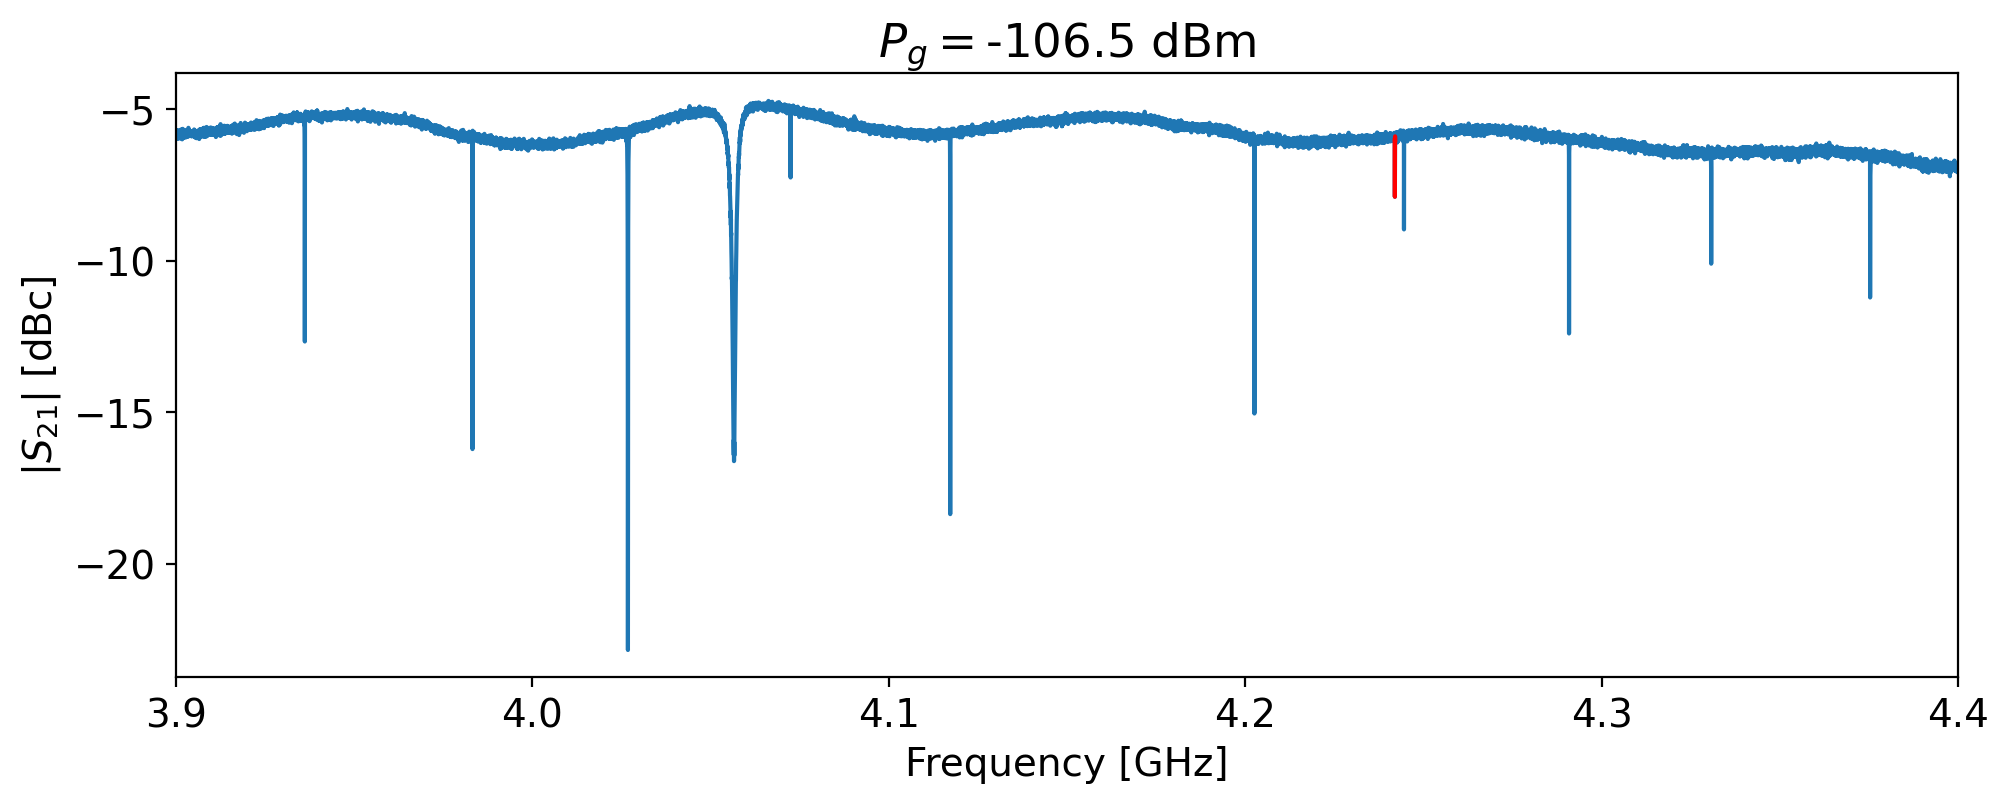

In [4]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(11.5,4),dpi=200)
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$|S_{21}|$ [dBc]")
ax0.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax0.plot(data_spc[key_f]/1e9,data_spc[key_lm])
ax0.set_xlim([np.min(data_spc[key_f])/1e9,np.max(data_spc[key_f])/1e9])


f = data_spc[key_f]/1e9
S = data_spc[key_lm]

S = S[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]
f = f[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]

ax0.plot(f,S,c='r')

In [5]:
MKID_f = np.array(data_Alr[key_f]/1e9)
MKID_z = np.array(data_Alr["mag"] * np.exp(1j*data_Alr["phi"]))

res_pars, res_errs = fitres.finefit(
    MKID_f, MKID_z, 
    np.mean(data_Alr[key_f]/1e9), 
    restrict_fit_MHz=None, 
    plot=False, 
    verbose=True)

Fr from fit  [GHz]: 4.241999740417594
Fr min curve [GHz]: 4.24199932382


In [6]:
fr = res_pars["f0"]
Qr = res_pars["Qr"]
Qc_hat = res_pars["QcHat"]
a = res_pars["zOff"]
phi = res_pars["phi"]
tau = res_pars["tau"]
Qc = res_pars["Qc"]

fit_z = fitres.resfunc3(MKID_f, fr, Qr, Qc_hat, a, phi, tau)

Text(4.242028, -9.718851355785, '$Q=$247k\n$Q_c=$681k\n$Q_i=$389k\n$f_r=$4.2420 GHz\n')

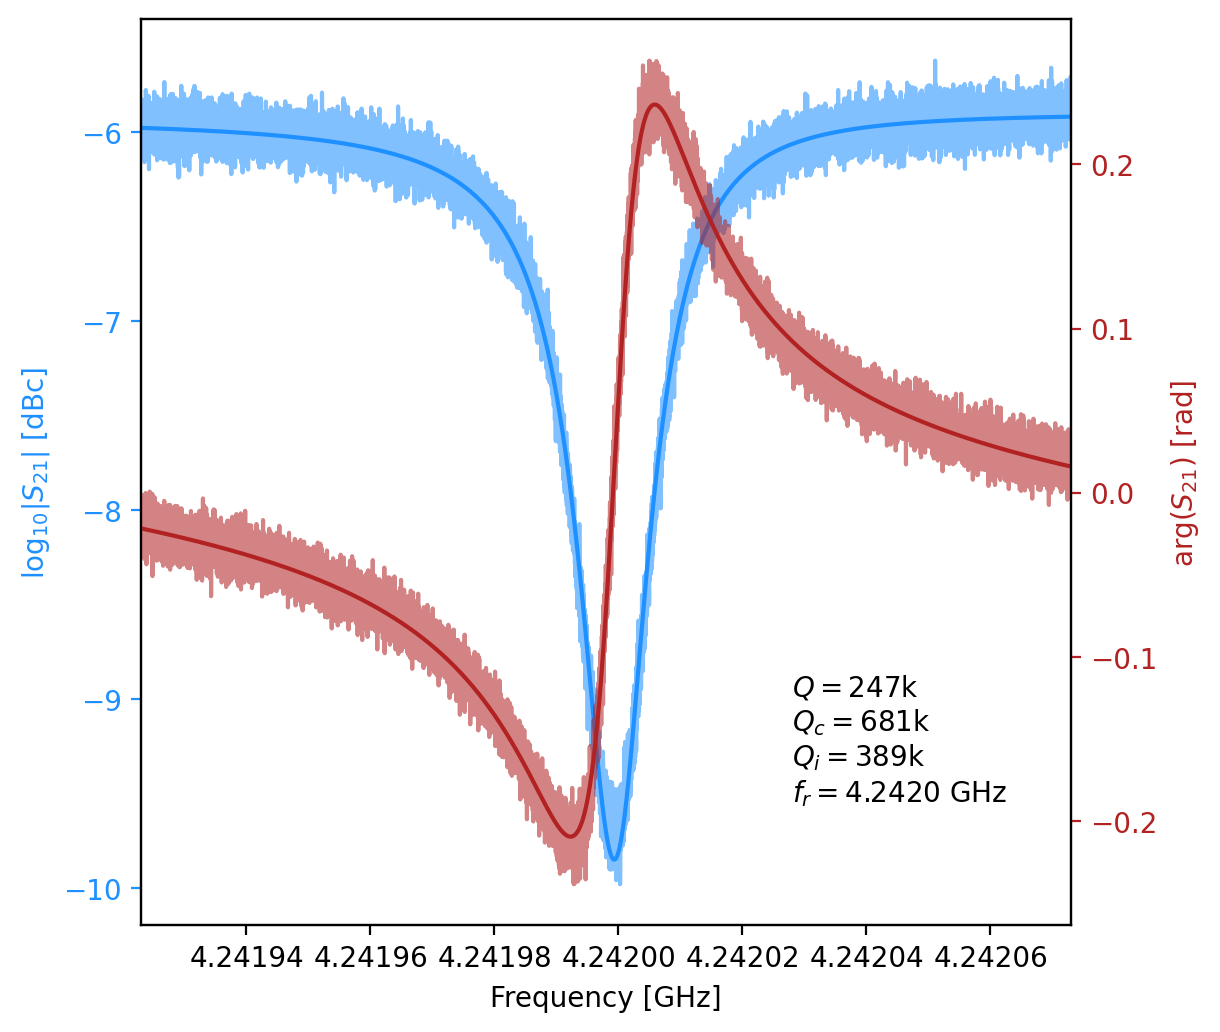

In [7]:
plt.rcParams.update({'font.size': 10})
fig = plt.figure(figsize=(6,6),dpi=200)
ax0 = fig.gca()
ax0.set_xlabel("Frequency [GHz]")
ax0.set_ylabel(r"$\log_{10}|S_{21}|$ [dBc]")
ax0.plot(data_Alr[key_f]/1e9,data_Alr[key_lm],c='dodgerblue',alpha=0.56)
ax0.plot(data_Alr[key_f]/1e9,20.0*np.log10(abs(fit_z)),c='dodgerblue')
ax0.set_xlim([np.min(data_Alr[key_f])/1e9,np.max(data_Alr[key_f])/1e9])

ax1 = ax0.twinx()
ax1.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")
ax1.plot(data_Alr[key_f]/1e9,data_Alr["phi"]-np.mean(data_Alr["phi"]),c='firebrick',alpha=0.56)
ax1.plot(data_Alr[key_f]/1e9,np.angle(fit_z)-np.mean(np.angle(fit_z)),c='firebrick')

ax0.yaxis.label.set_color('dodgerblue')        #setting up X-axis label color to yellow
ax1.yaxis.label.set_color('firebrick')    

ax0.tick_params(axis='y', colors='dodgerblue')    #setting up X-axis tick color to red
ax1.tick_params(axis='y', colors='firebrick')

xlims = ax0.get_xlim()
xspan = xlims[1]-xlims[0]

ylims = ax0.get_ylim()
yspan = ylims[1]-ylims[0]


fit_info = ( r"$Q=$"+str(int(Qr/1e3))+"k\n" + 
             r"$Q_c=$"+str(int(Qc/1e3))+"k\n" + 
             r"$Q_i=$"+str(int(1./(1./Qr - 1./Qc)/1e3))+"k\n" + 
             (r"$f_r=$%.4f" % fr)+" GHz\n" )

ax0.text(xlims[0]+0.70*xspan, ylims[0]+0.10*yspan,fit_info)

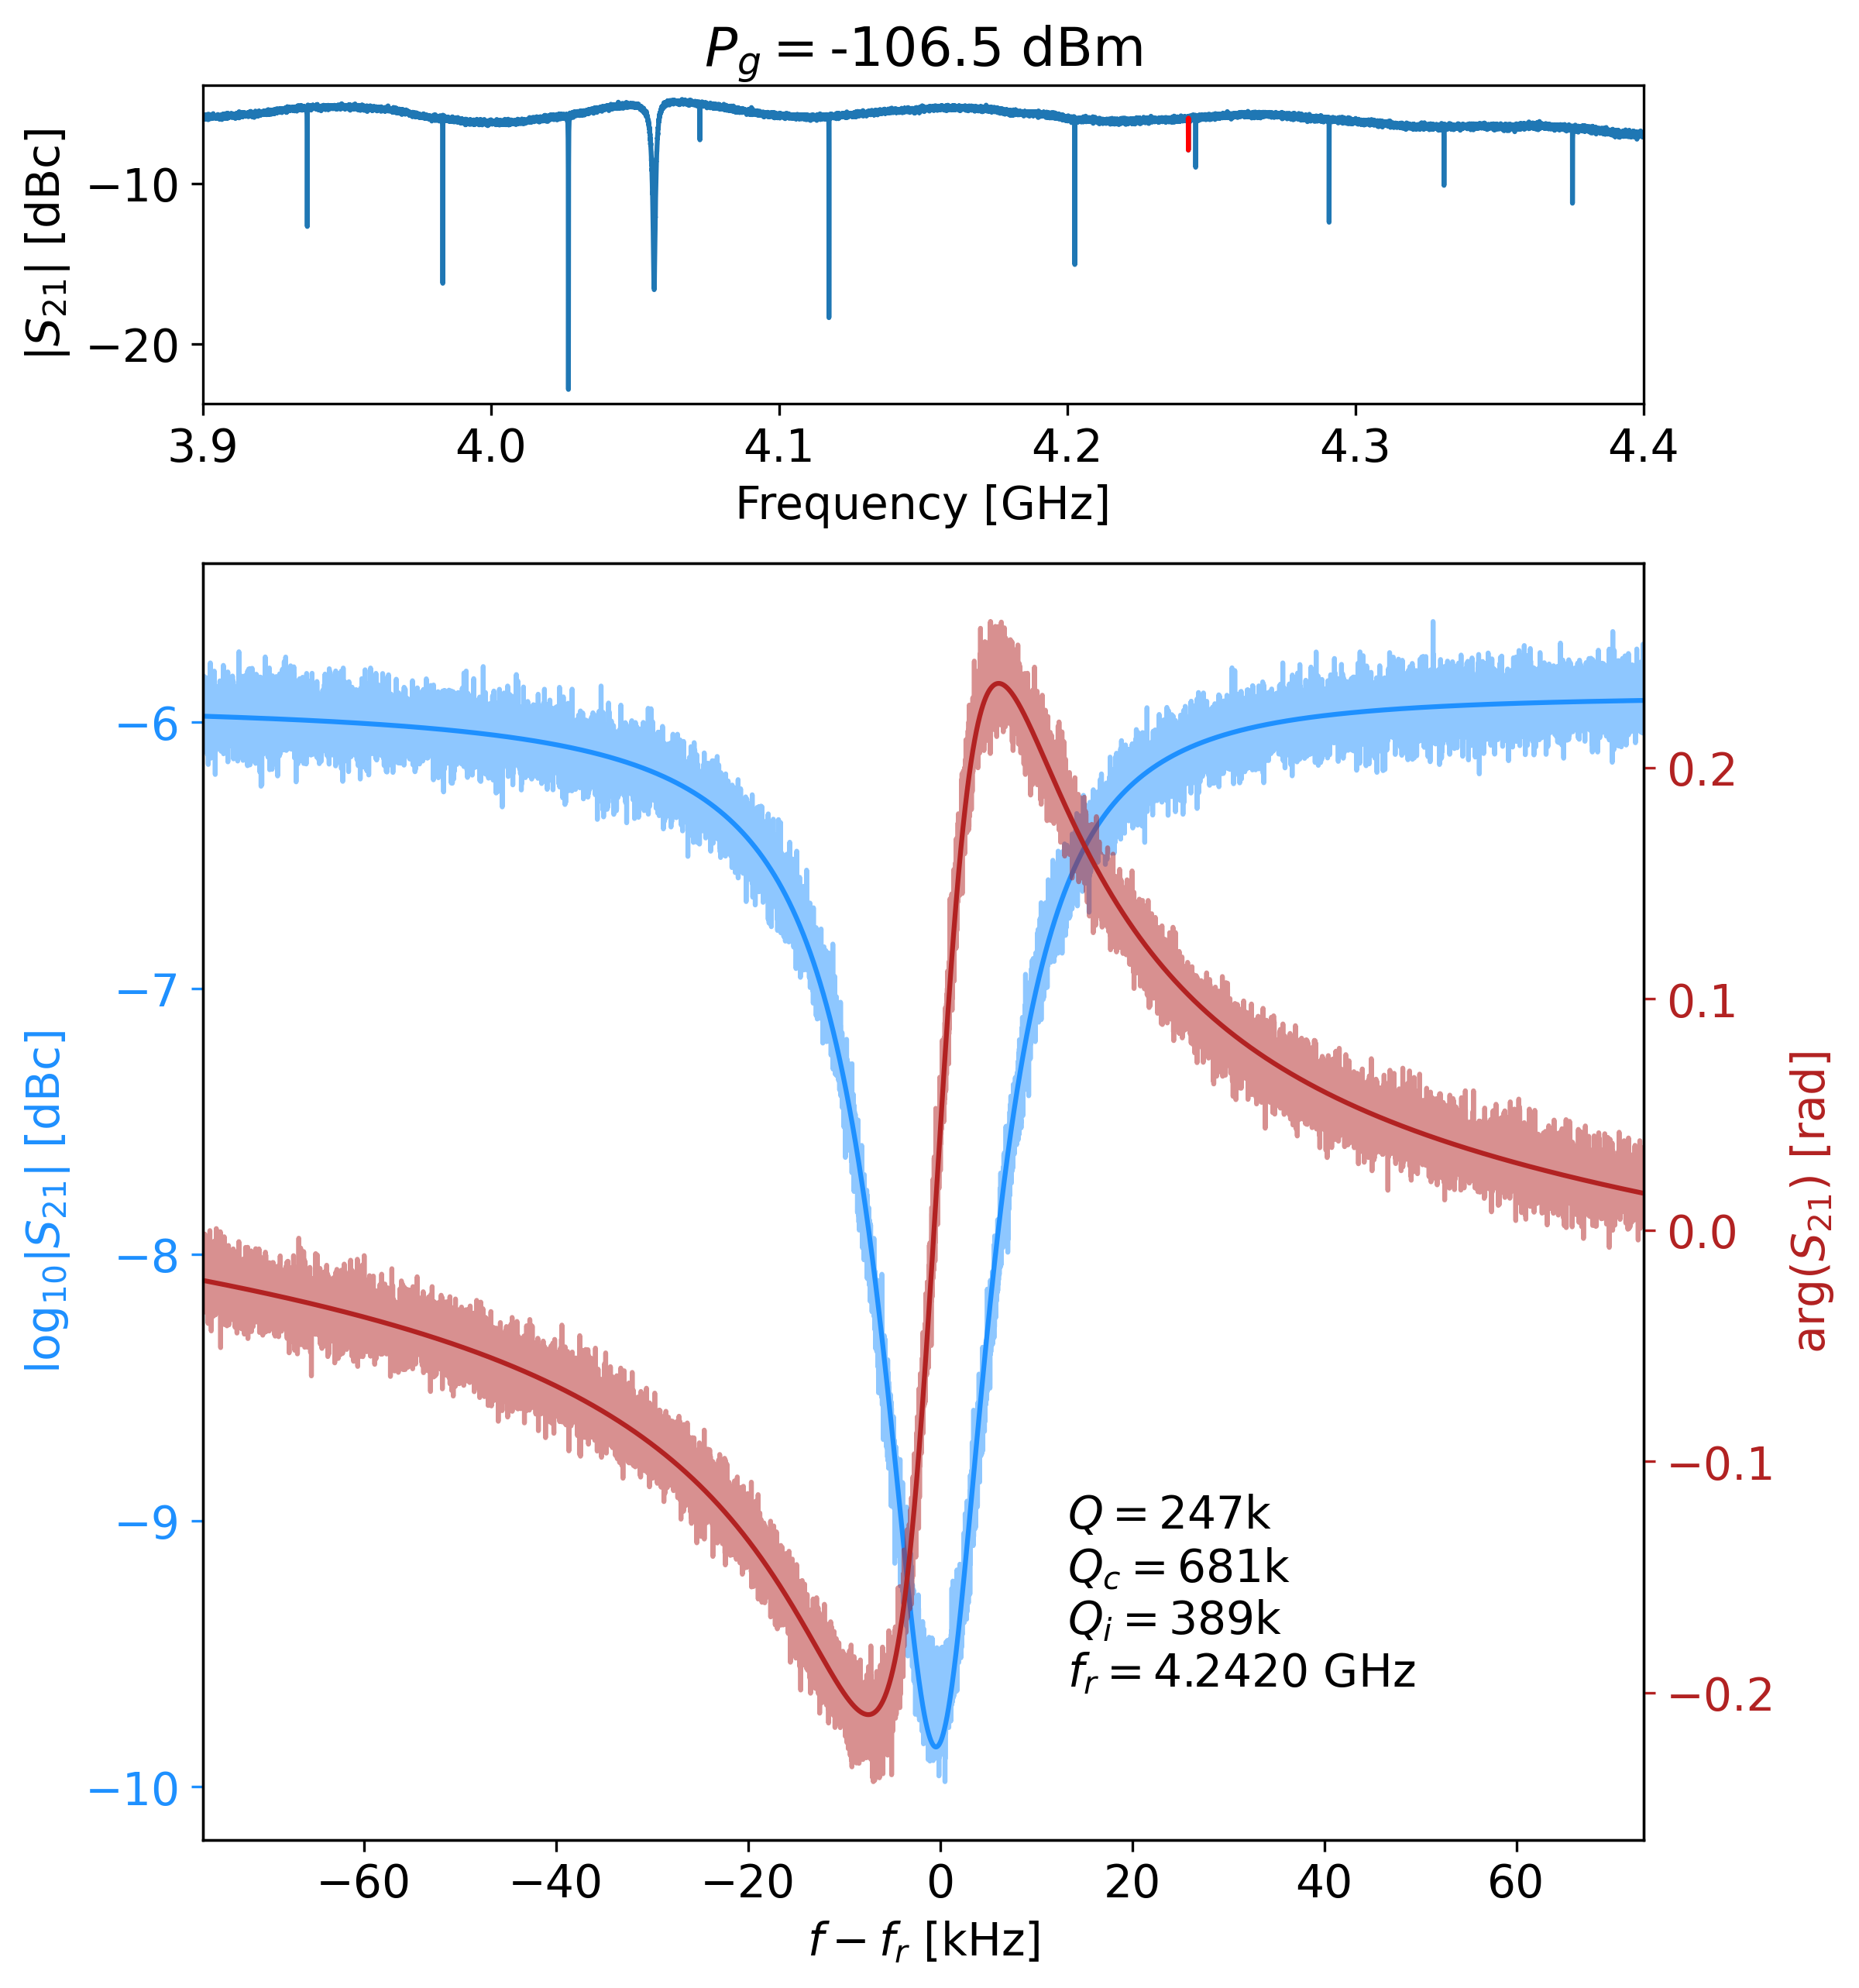

In [8]:
df_kHz = 1e6*((data_Alr[key_f]/1e9) - fr)

plt.rcParams.update({'font.size': 14})

from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(8,10),dpi=300)

# Define the grid
gs = GridSpec(2, 1, height_ratios=[1, 4])
gs.update(hspace=0.20) 

# Define the full spectrum plot
ax = fig.add_subplot(gs[0])

ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$|S_{21}|$ [dBc]")
ax.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax.plot(data_spc[key_f]/1e9,data_spc[key_lm])
ax.set_xlim([np.min(data_spc[key_f])/1e9,np.max(data_spc[key_f])/1e9])

f = data_spc[key_f]/1e9
S = data_spc[key_lm]

S = S[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]
f = f[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]

ax.plot(f,S,c='r')

# Define the Al resonance plots
ax0 = fig.add_subplot(gs[1])
ax0.set_xlabel(r"$f-f_r$ [kHz]")
ax0.set_ylabel(r"$\log_{10}|S_{21}|$ [dBc]")
ax0.plot(df_kHz,data_Alr[key_lm],c='dodgerblue',alpha=0.50)
ax0.plot(df_kHz,20.0*np.log10(abs(fit_z)),c='dodgerblue')
ax0.set_xlim([np.min(df_kHz),np.max(df_kHz)])

ax1 = ax0.twinx()
ax1.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")
ax1.plot(df_kHz,data_Alr["phi"]-np.mean(data_Alr["phi"]),c='firebrick',alpha=0.50)
ax1.plot(df_kHz,np.angle(fit_z)-np.mean(np.angle(fit_z)),c='firebrick')

ax0.yaxis.label.set_color('dodgerblue')        #setting up X-axis label color to yellow
ax1.yaxis.label.set_color('firebrick')    

ax0.tick_params(axis='y', colors='dodgerblue')    #setting up X-axis tick color to red
ax1.tick_params(axis='y', colors='firebrick')

xlims = ax0.get_xlim()
xspan = xlims[1]-xlims[0]

ylims = ax0.get_ylim()
yspan = ylims[1]-ylims[0]


fit_info = ( r"$Q=$"+str(int(Qr/1e3))+"k\n" + 
             r"$Q_c=$"+str(int(Qc/1e3))+"k\n" + 
             r"$Q_i=$"+str(int(1./(1./Qr - 1./Qc)/1e3))+"k\n" + 
             (r"$f_r=$%.4f" % fr)+" GHz\n" )

ax0.text(xlims[0]+0.60*xspan, ylims[0]+0.08*yspan,fit_info)

fig.savefig("resonanceplots.pdf", dpi='figure', format='pdf')

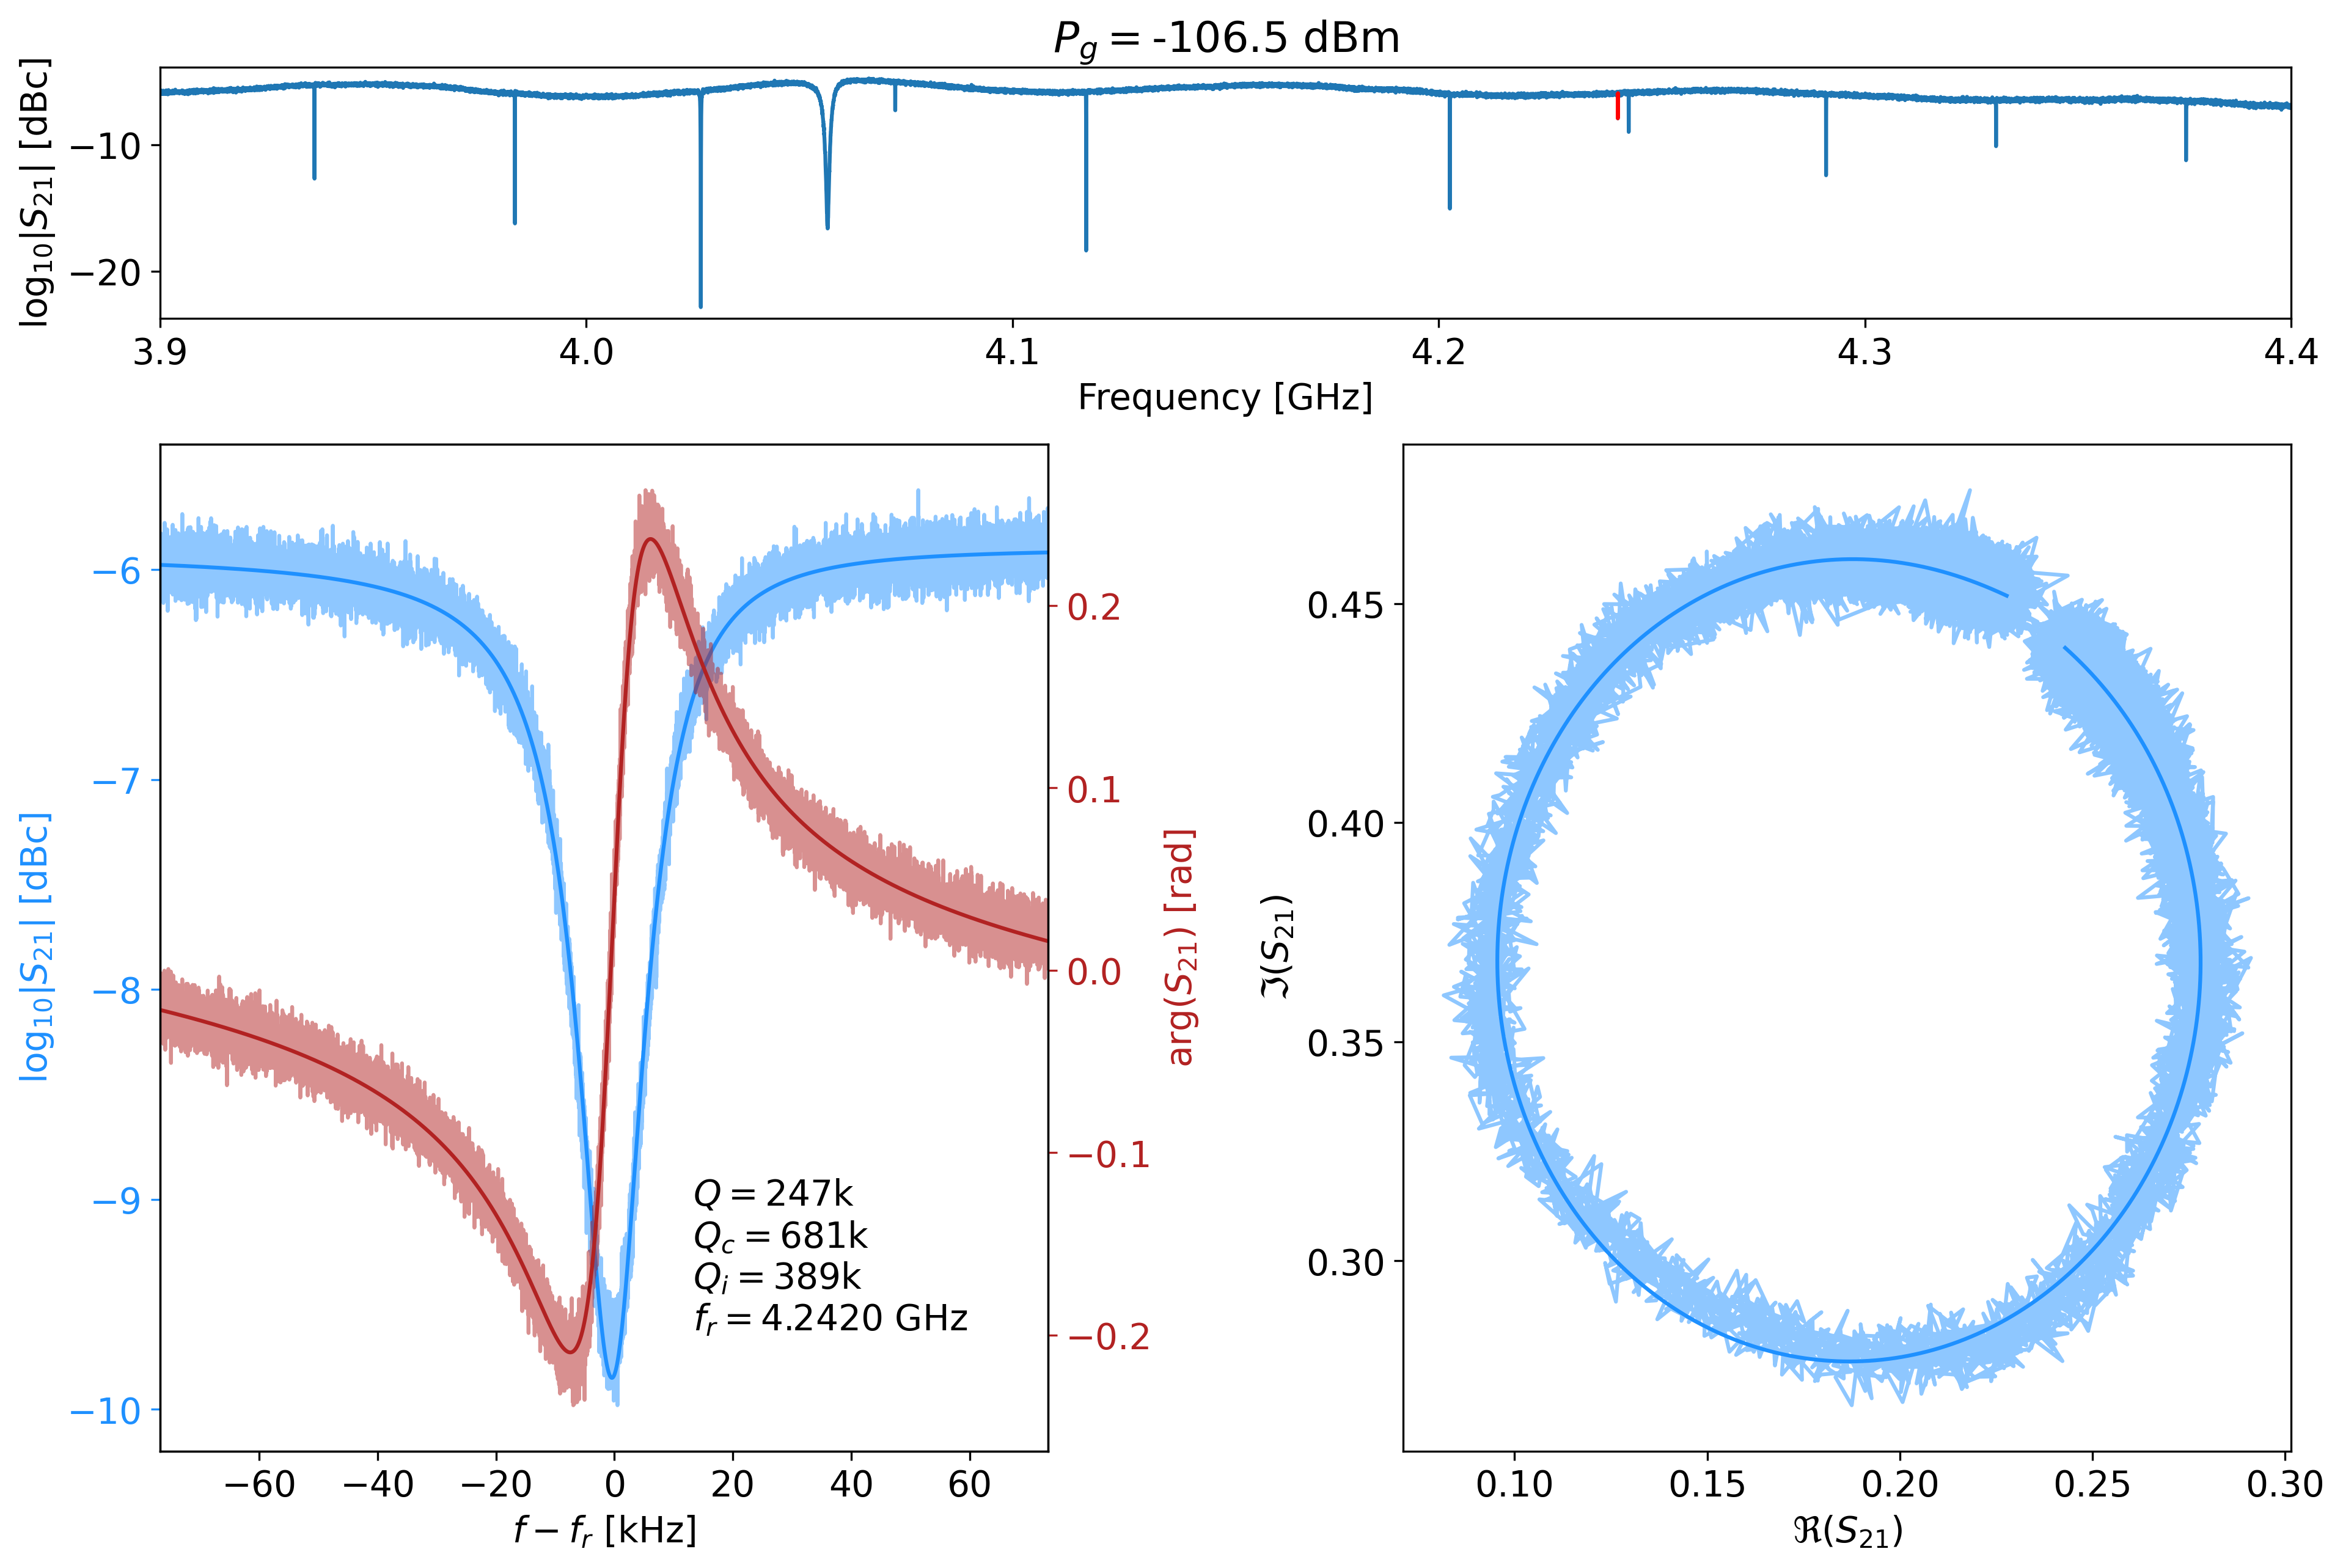

In [20]:
df_kHz = 1e6*((data_Alr[key_f]/1e9) - fr)

plt.rcParams.update({'font.size': 14})

from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(15,10),dpi=300)

# Define the grid
gs = GridSpec(2, 2, height_ratios=[1, 4])
gs.update(hspace=0.20,wspace=0.4) 

# Define the full spectrum plot
ax = fig.add_subplot(gs[0:2])

ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel(r"$\log_{10}|S_{21}|$ [dBc]")
ax.set_title(r"$P_g=$"+str(-50-line_atten_dB)+" dBm")
ax.plot(data_spc[key_f]/1e9,data_spc[key_lm])
ax.set_xlim([np.min(data_spc[key_f])/1e9,np.max(data_spc[key_f])/1e9])

f = data_spc[key_f]/1e9
S = data_spc[key_lm]

S = S[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]
f = f[(f>np.min(data_Alr[key_f])/1e9)&(f<np.max(data_Alr[key_f])/1e9)]

ax.plot(f,S,c='r')

# Define the Al resonance plots
ax0 = fig.add_subplot(gs[2])
ax0.set_xlabel(r"$f-f_r$ [kHz]")
ax0.set_ylabel(r"$\log_{10}|S_{21}|$ [dBc]")
ax0.plot(df_kHz,data_Alr[key_lm],c='dodgerblue',alpha=0.50)
ax0.plot(df_kHz,20.0*np.log10(abs(fit_z)),c='dodgerblue')
ax0.set_xlim([np.min(df_kHz),np.max(df_kHz)])

ax1 = ax0.twinx()
ax1.set_ylabel(r"$\mathrm{arg}(S_{21})$ [rad]")
ax1.plot(df_kHz,data_Alr["phi"]-np.mean(data_Alr["phi"]),c='firebrick',alpha=0.50)
ax1.plot(df_kHz,np.angle(fit_z)-np.mean(np.angle(fit_z)),c='firebrick')

ax0.yaxis.label.set_color('dodgerblue')        #setting up X-axis label color to yellow
ax1.yaxis.label.set_color('firebrick')    

ax0.tick_params(axis='y', colors='dodgerblue')    #setting up X-axis tick color to red
ax1.tick_params(axis='y', colors='firebrick')

xlims = ax0.get_xlim()
xspan = xlims[1]-xlims[0]

ylims = ax0.get_ylim()
yspan = ylims[1]-ylims[0]


fit_info = ( r"$Q=$"+str(int(Qr/1e3))+"k\n" + 
             r"$Q_c=$"+str(int(Qc/1e3))+"k\n" + 
             r"$Q_i=$"+str(int(1./(1./Qr - 1./Qc)/1e3))+"k\n" + 
             (r"$f_r=$%.4f" % fr)+" GHz\n" )

ax0.text(xlims[0]+0.60*xspan, ylims[0]+0.08*yspan,fit_info)


# Define the Al resonance plots
ax2 = fig.add_subplot(gs[3])
ax2.set_xlabel(r"$\Re(S_{21})$")
ax2.set_ylabel(r"$\Im(S_{21})$")
ax2.plot(data_Alr["S21r"],data_Alr["S21i"],c='dodgerblue',alpha=0.50)
ax2.plot(fit_z.real,fit_z.imag,c='dodgerblue')
# ax2.set_xlim([np.min(df_kHz),np.max(df_kHz)])



fig.savefig("resonanceplots.pdf", dpi='figure', format='pdf')